# **Aprendizado Supervisionado - Aula 3**

***Nesta atividade você deverá demonstrar os conhecimentos adquiridos até o momento, aplicando-os em uma tarefa de aprendizado supervisionado.***


*   Você deverá utilizar o conjunto de dados ***Social Network Ads***, disponível em: https://www.kaggle.com/rakeshrau/social-network-ads/download ou [Download arquivo](https://drive.google.com/file/d/1840_pUTLcu1VM9avDxpo3t9p6cKV2nmc/view?usp=sharing
)

> Este conjunto de dados (dataset) apresenta dados sobre usuários em uma rede social e seu comportamento de compra. O objetivo do seu projeto final é utilizar ML para responder se um determinado usuário, após clicar em um anúncio na rede social comprará ou não um determinado produto. (Purchased, 0 = não, 1 = sim)




*   Utilize as bibliotecas Numpy, Pandas, Matplotlib, Scikit-learn e outras que achar necessárias para realizar as atividades




---



1.	Realizar a análise exploratória dos dados e aplicar técnicas de pré-processamento caso sejam necessárias

In [10]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression #Regressão Linear
from sklearn.tree import DecisionTreeRegressor, plot_tree #Árvores de Regressão
from sklearn.tree import export_text

from sklearn.metrics import mean_squared_error, r2_score #Métricas

In [11]:
# --- Importar o conjunto de dados
! pip install kaggle
! kaggle datasets download -d rakeshrau/social-network-ads
! unzip corn-crop-growth.zip
! rm corn-crop-growth.zip


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads
License(s): unknown
social-network-ads.zip: Skipping, found more recently modified local copy (use --force to force download)


'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [12]:
# --- Explorar o conjunto de dados e realizar pré-processamento se necessário
df = pd.read_csv('Social_Network_Ads.csv')

df.info() #Informações gerais sobre o dataset
df.head() #Visualização das primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


2.	Implementar ao menos um método de aprendizado supervisionado

In [13]:
# ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder


drop_null = df.dropna() #Removendo linhas com valores nulos
df_encoded = pd.get_dummies(drop_null, columns=['Gender'])
df_encoded.head()

X = df_encoded.drop('Purchased', axis=1)
y = df_encoded['Purchased']


# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 3 #Número de vizinhos próximos

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

3.	Utilizar ao menos alguma técnica de avaliação do desempenho do modelo

A acurácia do classificador é: 0.725


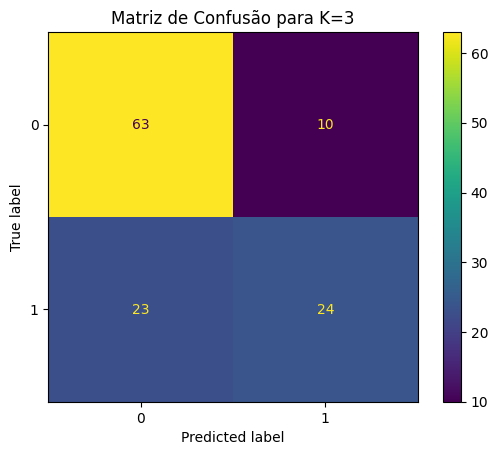

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Exibir a acurácia
print("A acurácia do classificador é:", accuracy_score(y_test, y_pred))

# Criando um LabelEncoder e ajustando aos valores únicos de y_test
label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Treina o LabelEncoder com os rótulos verdadeiros

# Exibir a matriz de confusão corretamente
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred),
    display_labels=label_encoder.classes_  # Aqui usamos o objeto instanciado
)

disp.plot()
plt.title(f'Matriz de Confusão para K={k}')
plt.show()

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

4.	Realizar análise do desempenho do modelo escolhido. Exemplos: indicar se foi necessário realizar algum pré-processamento nos dados, comentar sobre os hiperparâmetros usados, explicar os resultados e a técnica de validação utilizada, entre outras.

> *Digite sua análise aqui - Descritiva*

